# Homework (9 pts) - Hypothesis Testing

**!!! For all of these problems, report ...**

1. Null and alternative hypothesis
2. Statistical test used
3. p-value
4. Whether or not you reject the null hypothesis
5. Your conclusion (if you reject H0, compute effect size and conclude whether it is notable or insiginificant)
6. Also show plots for all distributions and fits to visually convey your answer

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

1. (3 pts) You record preference for two types of food in fruit flies both with and without a particular genetic mutation. The observed preferences for the wild type and mutant flies are given below as a percentage preference for the second type of food. Based on these data, does the mutation affect food preference?

In [4]:
wildtype_preferences = np.array([ 0.28885188,  0.2588082 ,  0.05799394,  0.07164829,  0.19333998,
        0.01091679,  0.44282437,  0.36793093,  0.50738263,  0.38513082,
        0.65311963,  0.12453818,  0.31059855,  0.01876252,  0.04821982,
        0.14205824,  0.27892539,  0.35233634,  0.27595719,  0.29724794,
        0.46863885,  0.0755555 ,  0.63664723,  0.09599987,  0.56361895,
        0.45012918,  0.66020498,  0.53918885,  0.41213266,  0.32532721,
        0.30789441,  0.34191489,  0.48879069,  0.55472356,  0.58525001,
        0.24434146,  0.42844333,  0.54672977,  0.34435792,  0.02048227,
        0.04397253,  0.30216907,  0.43956293,  0.60598365,  0.15728511,
        0.34337698,  0.37455406,  0.43860047,  0.80005802,  0.40343915,
        0.05160169,  0.36000792,  0.20517276,  0.48766824,  0.149819  ,
        0.39059716,  0.06871746,  0.48061071,  0.30628055,  0.15570261,
        0.38794774,  0.1941166 ,  0.10078964,  0.45907106,  0.38066673,
        0.16363579,  0.16359528,  0.19008684,  0.63432502,  0.30032657,
        0.56909549,  0.37825979,  0.28292827,  0.02042276,  0.39645661,
        0.03862624,  0.19570261,  0.29236391,  0.26134538,  0.36130782,
        0.28290655,  0.6276269 ,  0.32693276,  0.24967911,  0.31089434,
        0.05390191,  0.43836224,  0.04181225,  0.07313774,  0.24542815,
        0.20615145,  0.33233753,  0.27280755,  0.19806798,  0.34639872,
        0.47275828,  0.05367041,  0.2542381 ,  0.46306256,  0.13057705])
mutant_preferences = np.array([0.60074209, 0.60256178, 0.57892997, 0.35112318, 0.64111754,
       0.48979591, 0.737234  , 0.56870259, 0.56709134, 0.60806825,
       0.66002828, 0.59811741, 0.40365766, 0.52304555, 0.60585631,
       0.56853969, 0.37718344, 0.59907934, 0.38516118, 0.31643742,
       0.49070073, 0.68118938, 0.49637198, 0.61866223, 0.46188606,
       0.40402117, 0.40983923, 0.38745532, 0.63916601, 0.61220114,
       0.68371523, 0.51221276, 0.62473997, 0.68933132, 0.61788304,
       0.63717813, 0.38631159, 0.61910704, 0.54684576, 0.50858714,
       0.57582568, 0.48339051, 0.47139463, 0.47812267, 0.51778687,
       0.61758098, 0.48604324, 0.58558085, 0.54716228, 0.42259187,
       0.43925602, 0.46467099, 0.6335449 , 0.48005499, 0.46738722,
       0.54174146, 0.66999528, 0.504001  , 0.56029637, 0.56752126,
       0.46702265, 0.57617006, 0.46826453, 0.4683179 , 0.45375169,
       0.55831395, 0.49094112, 0.57239097, 0.38920328, 0.52151962,
       0.5441751 , 0.5163564 , 0.6910742 , 0.50052736, 0.58715903,
       0.48562656, 0.56580902, 0.66455626, 0.81862651, 0.44665288,
       0.61624982, 0.66404732, 0.7808477 , 0.62213509, 0.5327159 ,
       0.37345594, 0.60006758, 0.68412384, 0.26802159, 0.5988552 ])

H0: The mutation has no effect on food preference.

Ha: The mutations does affect food preference.

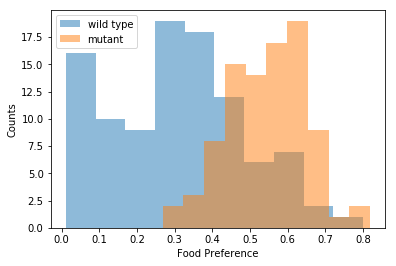

In [6]:
plt.hist(wildtype_preferences, alpha=0.5, label='wild type')
plt.hist(mutant_preferences, alpha=0.5, label='mutant')
plt.xlabel('Food Preference')
plt.ylabel('Counts')
plt.legend();

In [7]:
st.normaltest(wildtype_preferences)

NormaltestResult(statistic=2.452368016610005, pvalue=0.2934100945913365)

In [8]:
st.normaltest(mutant_preferences)

NormaltestResult(statistic=0.2053364381370596, pvalue=0.9024263316670053)

Distributions are normal-ish, so we'll use a two independent samples t-Test.

In [9]:
t, p = st.ttest_ind(wildtype_preferences, mutant_preferences)
print(f"p-value for H0 (mutation has no effect on food preference) is {p}")

p-value for H0 (mutation has no effect on food preference) is 1.311473960406664e-21


Reject H0.

In [12]:
effectSize = (mutant_preferences.mean() - wildtype_preferences.mean()) / wildtype_preferences.std()
effectSize

1.3091587586256361

Mutation does have a sizable effect on food preference.

2. (3 pts) After subjecting a group of mice to enriched housing conditions, you record the length of time that a mouse hangs motionless when suspended from its tail as a proxy measure for level of depression (see below). Based on your observations, did the enriched housing condition reduce depression (err, hang time) in the mice as compared to mice living in normal housing conditions that hang motionless for on average 1.5 seconds.

In [13]:
time_motionless = np.array([1.09312953, 1.88156956, 1.72967305, 1.1863167 , 1.67249086,
       1.72522565, 0.91064355, 1.24608586, 1.05439035, 1.35740275,
       1.62138371, 1.41632385, 1.24616428, 1.74652431, 0.87919139,
       1.65583844, 0.72389185, 1.46078855, 1.36755476, 1.22215036,
       0.74527807, 0.98168823, 0.7203495 , 1.70308226, 0.84433681,
       1.4470557 , 1.00698794, 1.13256686, 1.22916875, 1.14040399])

H0: The enriched housing condition does not reduce depression level.

Ha: The enriched housing conditions does reduce depression level.

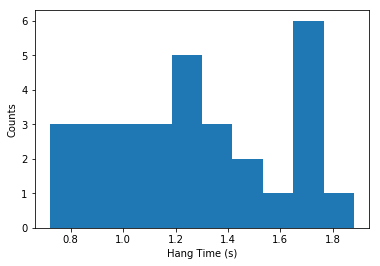

In [15]:
plt.hist(time_motionless)
plt.xlabel('Hang Time (s)');
plt.ylabel('Counts');

In [16]:
st.normaltest(time_motionless)

NormaltestResult(statistic=3.3972435701021304, pvalue=0.18293547479776862)

Distribution is normal-ish, so we'll use a one sample t-Test against a known mean.

In [18]:
t, p = st.ttest_1samp(time_motionless, 1.5)
print(f"p-value for H0 (enriched housing conditions have no effect) is {p :.4f}")

p-value for H0 (enriched housing conditions have no effect) is 0.0010


Reject H0 as p < 0.05

In [19]:
effectSize = (time_motionless.mean() - 1.5) / time_motionless.std()
effectSize

-0.682067630277958

Housing conditions do noticeabley reduce depression level (err, hang time).

However, effect is modest given the variance.

3. (3 pts) Using patch clamp electrophysiololgy, you record the open probability of a type of sodium channel at -20 mV both before and after application of a toxin to each patch. You repeat the experiment for patches from 30 different cells. Does the toxin affect channel open probability?

In [20]:
Po_control = np.array([0.78339041, 0.86804638, 0.60413736, 0.80239205, 0.76216265,
        0.51962546, 0.41775704, 0.54792331, 0.98626396, 1.04275344,
        0.72999907, 0.6863022 , 0.9016124 , 0.7437607 , 1.06505527,
        0.48799601, 0.68937684, 1.09427898, 0.50710322, 0.81609674,
        0.68236915, 0.67887485, 0.75364394, 0.43940102, 1.14003395,
        0.628266  , 1.05366161, 1.08761371, 0.38326866, 0.54405482])
Po_toxin = np.array([ 0.75791195, 0.0572936 ,  0.54145724, 0.3484273, 0.39734596,
        0.25847583,  0.49373264, 0.12637632,  0.6183216 , 0.47778511,
        0.24446712,  0.61216739, 0.61296746,  0.16546105, 0.84528945,
        0.38430718,  0.88450765, 0.24744299,  0.70027385, 0.70734415,
        0.25764896,  0.51795224, 0.01804675,  0.14647023,  0.88705361,
        0.11454288,  0.42658221,0.36847893,  0.70340362,  0.76809346])

H0: Toxin has no effect on open probability.

Ha: Toxin alters open probability.

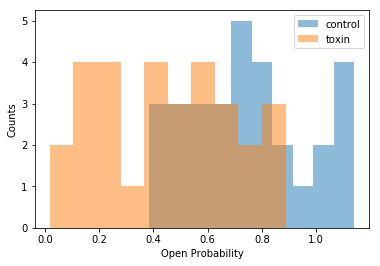

In [21]:
plt.hist(Po_control, alpha=0.5, label='control')
plt.hist(Po_toxin, alpha=0.5, label='toxin')
plt.xlabel('Open Probability')
plt.ylabel('Counts')
plt.legend();

In [22]:
st.normaltest(Po_control), st.normaltest(Po_toxin)

(NormaltestResult(statistic=2.731244963307745, pvalue=0.2552217556701443),
 NormaltestResult(statistic=4.1081596971083165, pvalue=0.12821075462876338))

Distributions are normal-ish, so we'll use a paired samples t-Test (pairs of values in each sample come from the same cell).

In [23]:
t, p = st.ttest_rel(Po_control, Po_toxin)
print(f"p-value for H0 (toxin has NO effect on open probability) is {p}")

p-value for H0 (toxin has NO effect on open probability) is 2.1558731132347196e-05


Reject H0 as p < 0.025

-0.939341261992198

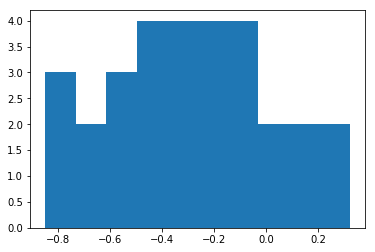

In [24]:
effects = Po_toxin - Po_control;

plt.hist(effects)

effectSize = effects.mean() / effects.std()
effectSize

Toxin does affect open probability (~30% reduction in Po).